In [4]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages (0.0)


In [5]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [6]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [7]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [27]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition','koi_fpflag_nt', 'koi_period', 'koi_time0bk', 'koi_srad', 'koi_duration', 'koi_depth', 'koi_teq']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [28]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features#.values.reshape(-1, 1)
y = selected_features["koi_disposition"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (6991, 8) (6991, 1)


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
X = selected_features.drop("koi_disposition",axis=1)
X 

,koi_fpflag_nt,koi_period,koi_time0bk,koi_srad,koi_duration,koi_depth,koi_teq
0,0,54.418383,162.513840,0.927,4.50700,874.8,443
1,0,19.899140,175.850252,0.868,1.78220,10829.0,638
2,0,1.736952,170.307565,0.791,2.40641,8079.2,1395
3,0,2.525592,171.595550,1.046,1.65450,603.3,1406
4,0,4.134435,172.979370,0.972,3.14020,686.0,1160
...,...,...,...,...,...,...,...
6986,0,8.589871,132.016100,1.088,4.80600,87.7,929
6987,0,0.527699,131.705093,0.903,3.22210,1579.2,2088
6988,0,1.739849,133.001270,1.031,3.11400,48.5,1608
6989,0,0.681402,132.181750,1.041,0.86500,103.6,2218


Text(0, 0.5, 'koi_disposition')

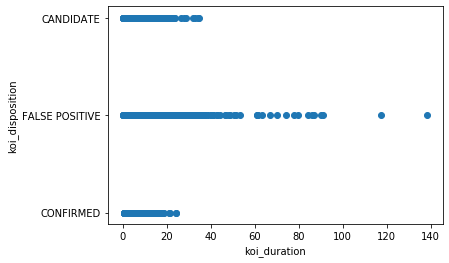

In [31]:
# Plot the data to see if a linear trend exists
x = selected_features["koi_duration"]
y = selected_features["koi_disposition"]
### BEGIN SOLUTION
plt.scatter(x, y)
plt.xlabel("koi_duration")
plt.ylabel("koi_disposition")
### END SOLUTION

Text(0, 0.5, 'koi_teq')

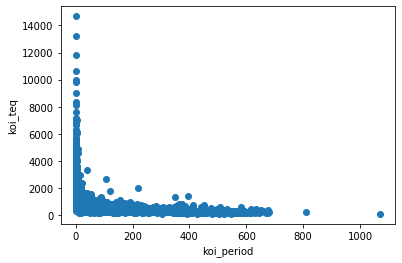

In [20]:
# Plot the data to see if a linear trend exists
x = selected_features["koi_period"]
y = selected_features["koi_teq"]
### BEGIN SOLUTION
plt.scatter(x, y)
plt.xlabel("koi_period")
plt.ylabel("koi_teq")
### END SOLUTION

Text(0, 0.5, 'koi_disposition')

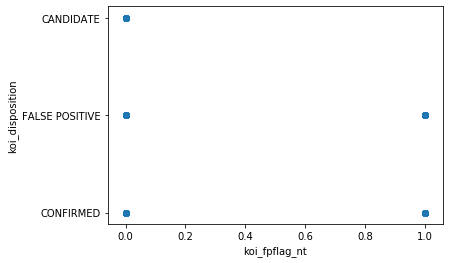

In [33]:

# Plot the data to see if a linear trend exists
x = selected_features["koi_fpflag_nt"]
y = selected_features["koi_disposition"]
### BEGIN SOLUTION
plt.scatter(x, y)
plt.xlabel("koi_fpflag_nt")
plt.ylabel("koi_disposition")
### END SOLUTION

In [34]:
# Set features. This will also be used as your x values.
#selected_features = df[['koi_period', 'koi_time0bk', 'koi_srad', 'koi_duration', 'koi_depth', 'koi_teq','koi_tce_plnt_num']]

Text(0, 0.5, 'koi_teq')

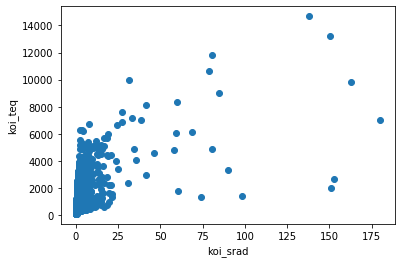

In [35]:
# Plot the data to see if a linear trend exists
x = selected_features["koi_srad"]
y = selected_features["koi_teq"]
### BEGIN SOLUTION
plt.scatter(x, y)
plt.xlabel("koi_srad")
plt.ylabel("koi_teq")
### END SOLUTION

Text(0, 0.5, 'koi_time0bk')

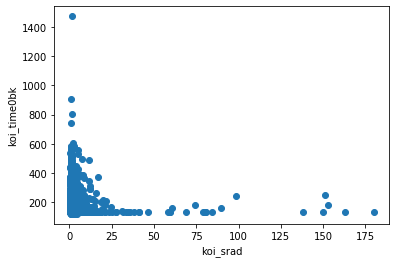

In [36]:
# Plot the data to see if a linear trend exists
x = selected_features["koi_srad"]
y = selected_features["koi_time0bk"]
### BEGIN SOLUTION
plt.scatter(x, y)
plt.xlabel("koi_srad")
plt.ylabel("koi_time0bk")
### END SOLUTION

Text(0, 0.5, 'koi_time0bk')

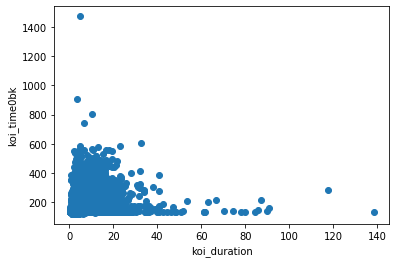

In [37]:
# Plot the data to see if a linear trend exists
x = selected_features["koi_duration"]
y = selected_features["koi_time0bk"]
### BEGIN SOLUTION
plt.scatter(x, y)
plt.xlabel("koi_duration")
plt.ylabel("koi_time0bk")
### END SOLUTION

In [38]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [39]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [40]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 2.5131714846248003e-26
R-squared (R2 ): 1.0


In [42]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

1.0

In [45]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

ValueError: Expected 2D array, got 1D array instead:
array=[133.07724   132.02005   134.46038   ... 134.4228253 134.8451
 134.79852  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

NameError: name 'y_scaler' is not defined

In [47]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

NameError: name 'y_train_scaled' is not defined

In [48]:
X_train.head()
X_test.head()
X_train_scaled

array([[-0.43647294, -0.42255034, -0.46799876, ..., -0.30020508,
        -0.29184902, -0.09141075],
       [-0.43647294, -0.47343342, -0.48359522, ..., -0.49623851,
        -0.29195105,  0.89945976],
       [ 2.29109277, -0.41509889, -0.44759365, ..., 11.14096287,
        -0.28563132, -0.12405119],
       ...,
       [-0.43647294, -0.42776623, -0.44814769, ..., -0.58919615,
        -0.26777525,  1.34710009],
       [ 2.29109277, -0.451432  , -0.44191797, ...,  3.2505948 ,
        -0.29132448,  1.16408048],
       [-0.43647294, -0.46046488, -0.44260516, ..., -0.03517748,
        -0.29153814,  0.25947398]])

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [49]:
X_train_scaled[0,1]

-0.4225503424565227

In [50]:
print(X_train_scaled[:,1])

[-0.42255034 -0.47343342 -0.41509889 ... -0.42776623 -0.451432
 -0.46046488]


## Transpose X

In [51]:
# Scale your data

In [52]:
#data = X.copy()

#data_binary_encoded = pd.get_dummies(data, columns=["koi_tce_plnt_num"])
#data_binary_encoded = pd.get_dummies(data, columns=["koi_fpflag_nt"])

#  -------------------------------------
#  koi_fpflag_nt
#  koi_fpflag_ss
#  koi_fpflag_co
#  koi_fpflag_ec
#  ------------------------------------- 

#data_binary_encoded.head()

In [53]:
#from sklearn.model_selection import train_test_split

#X = pd.get_dummies(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#X_train.head()

# Train the Model



In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [55]:

#selected_features.describe() 
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


## Applying One-Hot Encoding

In [56]:
# Step 0: Reformat data
data = df.values
# X = data[:, 0:4]
# y = data[:, 4]
data
X,y

(      koi_fpflag_nt  koi_period  koi_time0bk  koi_srad  koi_duration  \
 0                 0   54.418383   162.513840     0.927       4.50700   
 1                 0   19.899140   175.850252     0.868       1.78220   
 2                 0    1.736952   170.307565     0.791       2.40641   
 3                 0    2.525592   171.595550     1.046       1.65450   
 4                 0    4.134435   172.979370     0.972       3.14020   
 ...             ...         ...          ...       ...           ...   
 6986              0    8.589871   132.016100     1.088       4.80600   
 6987              0    0.527699   131.705093     0.903       3.22210   
 6988              0    1.739849   133.001270     1.031       3.11400   
 6989              0    0.681402   132.181750     1.041       0.86500   
 6990              0    4.856035   135.993300     1.193       3.07800   
 
       koi_depth  koi_teq  
 0         874.8      443  
 1       10829.0      638  
 2        8079.2     1395  
 3        

In [57]:
from sklearn.preprocessing import LabelEncoder
# y = ['red', 'blue', 'purple', 'pink']
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)


In [58]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: 162.51384
Encoded Label: 5049
------------
Original Class: 175.850252
Encoded Label: 5672
------------
Original Class: 170.30756499999998
Encoded Label: 5268
------------
Original Class: 171.59555
Encoded Label: 5408
------------
Original Class: 172.97937
Encoded Label: 5525
------------
Original Class: 179.55437
Encoded Label: 5818
------------
Original Class: 173.621937
Encoded Label: 5560
------------
Original Class: 122.763305
Encoded Label: 9
------------
Original Class: 121.35854170000002
Encoded Label: 4
------------
Original Class: 121.1194228
Encoded Label: 2
------------
Original Class: 133.98318
Encoded Label: 2574
------------
Original Class: 170.839688
Encoded Label: 5330
------------
Original Class: 184.5521637
Encoded Label: 5912
------------
Original Class: 180.881761
Encoded Label: 5845
------------
Original Class: 173.25815500000002
Encoded Label: 5541
------------
Original Class: 171.602959
Encoded Label: 5409
------------
Original Class: 170.73769
En

Original Class: 142.69218
Encoded Label: 4275
------------
Original Class: 135.23432
Encoded Label: 3087
------------
Original Class: 136.8627229
Encoded Label: 3506
------------
Original Class: 138.81933999999998
Encoded Label: 3869
------------
Original Class: 133.50201
Encoded Label: 2263
------------
Original Class: 155.5577
Encoded Label: 4890
------------
Original Class: 148.39117
Encoded Label: 4641
------------
Original Class: 131.61796
Encoded Label: 231
------------
Original Class: 140.63504
Encoded Label: 4075
------------
Original Class: 131.87906999999998
Encoded Label: 747
------------
Original Class: 143.83318290000003
Encoded Label: 4371
------------
Original Class: 132.82179
Encoded Label: 1857
------------
Original Class: 153.344695
Encoded Label: 4810
------------
Original Class: 138.64907
Encoded Label: 3835
------------
Original Class: 135.41595
Encoded Label: 3132
------------
Original Class: 140.92561
Encoded Label: 4106
------------
Original Class: 133.39088
Enc

------------
Original Class: 135.379512
Encoded Label: 3127
------------
Original Class: 208.08042
Encoded Label: 6145
------------
Original Class: 164.2859
Encoded Label: 5097
------------
Original Class: 170.10238
Encoded Label: 5250
------------
Original Class: 134.11594
Encoded Label: 2653
------------
Original Class: 156.97935
Encoded Label: 4922
------------
Original Class: 180.20215
Encoded Label: 5829
------------
Original Class: 169.715517
Encoded Label: 5205
------------
Original Class: 137.38521
Encoded Label: 3622
------------
Original Class: 168.07113999999999
Encoded Label: 5161
------------
Original Class: 169.90496000000002
Encoded Label: 5228
------------
Original Class: 169.61512
Encoded Label: 5192
------------
Original Class: 175.62345
Encoded Label: 5662
------------
Original Class: 163.5692
Encoded Label: 5080
------------
Original Class: 171.92457
Encoded Label: 5448
------------
Original Class: 131.71857
Encoded Label: 404
------------
Original Class: 171.133613

Encoded Label: 4983
------------
Original Class: 136.63972890000002
Encoded Label: 3465
------------
Original Class: 148.044865
Encoded Label: 4632
------------
Original Class: 131.5669078
Encoded Label: 145
------------
Original Class: 133.36007
Encoded Label: 2187
------------
Original Class: 134.96951
Encoded Label: 3000
------------
Original Class: 133.253208
Encoded Label: 2126
------------
Original Class: 138.80624
Encoded Label: 3866
------------
Original Class: 154.45296000000002
Encoded Label: 4857
------------
Original Class: 132.8453
Encoded Label: 1868
------------
Original Class: 133.28136
Encoded Label: 2142
------------
Original Class: 131.59833999999998
Encoded Label: 194
------------
Original Class: 134.3171
Encoded Label: 2746
------------
Original Class: 165.99843719999998
Encoded Label: 5127
------------
Original Class: 133.27081
Encoded Label: 2135
------------
Original Class: 135.9204
Encoded Label: 3267
------------
Original Class: 142.5217
Encoded Label: 4265
--

------------
Original Class: 139.0225
Encoded Label: 3889
------------
Original Class: 143.1523
Encoded Label: 4313
------------
Original Class: 157.97325
Encoded Label: 4942
------------
Original Class: 232.6163
Encoded Label: 6295
------------
Original Class: 361.8842
Encoded Label: 6781
------------
Original Class: 391.9313
Encoded Label: 6855
------------
Original Class: 217.0496
Encoded Label: 6211
------------
Original Class: 307.0728
Encoded Label: 6580
------------
Original Class: 257.6476
Encoded Label: 6411
------------
Original Class: 210.6893
Encoded Label: 6165
------------
Original Class: 165.6794
Encoded Label: 5122
------------
Original Class: 136.54528
Encoded Label: 3434
------------
Original Class: 131.85686
Encoded Label: 704
------------
Original Class: 134.084891
Encoded Label: 2641
------------
Original Class: 245.1789
Encoded Label: 6360
------------
Original Class: 131.6579596
Encoded Label: 297
------------
Original Class: 163.1091
Encoded Label: 5064
--------

------------
Original Class: 132.3501939
Encoded Label: 1434
------------
Original Class: 139.687525
Encoded Label: 3980
------------
Original Class: 139.9908385
Encoded Label: 4017
------------
Original Class: 556.5161
Encoded Label: 6964
------------
Original Class: 145.5541
Encoded Label: 4496
------------
Original Class: 131.80305
Encoded Label: 558
------------
Original Class: 131.8233
Encoded Label: 624
------------
Original Class: 131.67764
Encoded Label: 322
------------
Original Class: 132.14191
Encoded Label: 1181
------------
Original Class: 208.7904
Encoded Label: 6150
------------
Original Class: 156.16783999999998
Encoded Label: 4908
------------
Original Class: 363.4177
Encoded Label: 6790
------------
Original Class: 131.80501
Encoded Label: 562
------------
Original Class: 131.6152743
Encoded Label: 226
------------
Original Class: 281.2973
Encoded Label: 6505
------------
Original Class: 205.0612
Encoded Label: 6127
------------
Original Class: 133.8909
Encoded Label:

In [59]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

NameError: name 'model2' is not defined

## Creating our Model:

#### We must first decide what kind of model to apply to our data.

#### For numerical data, we use a regressor model.

#### For categorical data, we use a classifier model.

#### Here we will use a classifier to build the following network:

# Defining our Model Architecture (the layers)

### We first need to create a sequential model

In [62]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Next, we add our first layer.## This layer requires you to specify both the number of inputs and the number of nodes that you want in the hidden layer.

In [63]:
from tensorflow.keras.layers import Dense
number_inputs = 5
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [64]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Now that we have the above architecture we compile our model

In [67]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
# estimator.get_params()
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)



ValueError: Error when checking input: expected dense_input to have shape (5,) but got array with shape (7,)

from sklearn.utils.fixes import loguniform
{'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['rbf'],
 'class_weight':['balanced', None]}

In [69]:
>>> from sklearn.model_selection import GridSearchCV
>>> from sklearn.calibration import CalibratedClassifierCV
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_moons
>>> X, y = make_moons()
>>> calibrated_forest = CalibratedClassifierCV(
...    base_estimator=RandomForestClassifier(n_estimators=10))
>>> param_grid = {
...    'base_estimator__max_depth': [2, 4, 6, 8]}
>>> search = GridSearchCV(calibrated_forest, param_grid, cv=5)
>>> search.fit(X, y)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]})

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=CalibratedClassifierCV(base_estimator=Ellipsis,
                                              cv='warn', method='sigmoid'),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
y_train.shape

(5243,)

In [71]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking input: expected dense_input to have shape (5,) but got array with shape (7,)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [72]:
# Create the GridSearchCV model

In [73]:
# Train the model with GridSearch

In [74]:
print(grid2.best_params_)
print(grid2.best_score_)

NameError: name 'grid2' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)